In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import neighbors
from sklearn.metrics import r2_score

In [61]:
house_data = pd.read_csv("house_data.csv")
house_data.head()

,price,surface,arrondissement
0,1820,46.1,1.0
1,1750,41.0,1.0
2,1900,55.0,1.0
3,1950,46.0,1.0
4,1950,49.0,1.0


In [62]:
house_data.shape

(827, 3)

In [63]:
# Première chose à faire : nettoyer la base de données.
house_data.describe()

,price,surface,arrondissement
count,827.000000,822.000000,822.000000
mean,2007.342201,58.045925,4.142336
std,1890.894229,44.827522,3.202151
min,390.000000,10.000000,1.000000
25%,1050.000000,28.655000,2.000000
50%,1567.000000,46.100000,3.000000
75%,2346.000000,73.000000,4.000000
max,25000.000000,415.000000,10.000000


In [64]:
house_data.isna().sum()

price             0
surface           5
arrondissement    5
dtype: int64

In [65]:
# Il y a très peu de lignes avec valeurs manquantes, on peut se contenter de les supprimer.
house_data = house_data.dropna()

In [67]:
# Y a-t-il des doublons ? Si oui, on les supprime.
house_data = house_data.drop_duplicates(keep="first")

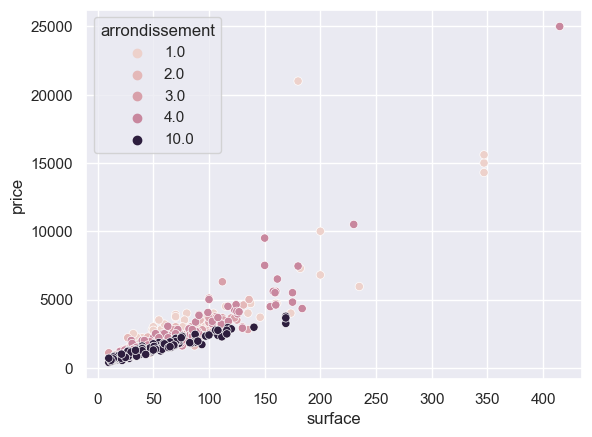

In [68]:
# Avant de faire du modeling en tant que tel, visualisons nos données.
sns.set_theme()
sns.scatterplot(data = house_data, x="surface", y="price", hue="arrondissement")
plt.show()

In [69]:
# On voit qu'on a certains outliers pour les grandes surfaces.
data = house_data.loc[house_data["surface"] < 250]
data = data.reset_index(drop="True")

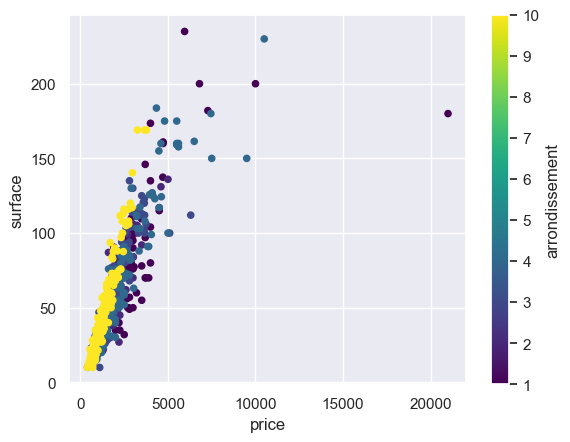

In [70]:
# Regardons ce que ça adonne désormais.
data.plot.scatter("price", "surface", c="arrondissement", colormap='viridis')
plt.show()

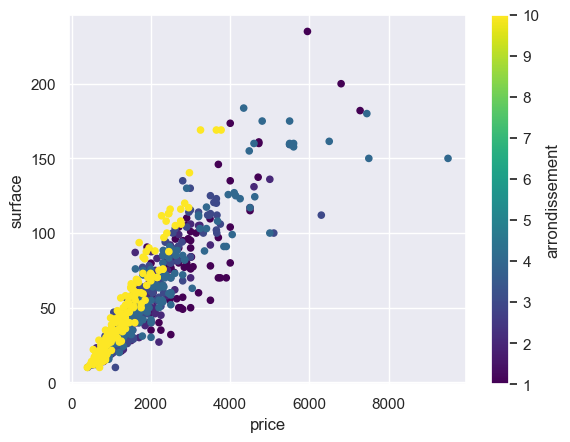

In [71]:
# On a encore un outlier. Supprimons-le.
data = data[data["price"] < 10000]
data.plot.scatter("price", "surface", c="arrondissement", colormap = "viridis")
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


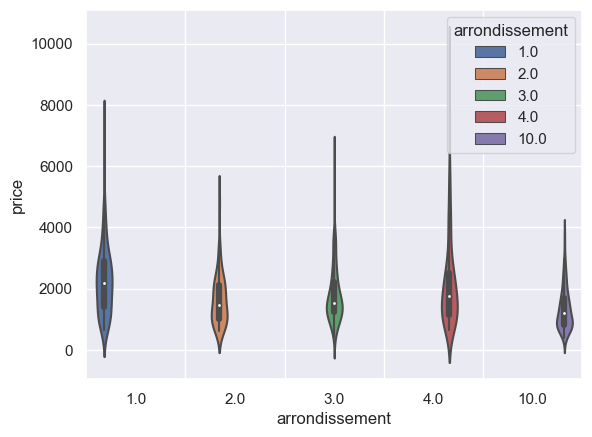

In [72]:
# Affichons maintenant la variable prédite (le loyer) en fonction de l'arrondissement
ax1 = sns.violinplot("arrondissement", "price", data=data, hue='arrondissement')
ax1.minorticks_on()
ax1.xaxis.set_minor_locator(AutoMinorLocator(2))
ax1.grid(which='minor', axis='x', linewidth=1)

C:\Users\kerya\AppData\Local\Temp\ipykernel_79984\741856358.py:3: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  fig = plt.figure().gca(projection='3d')


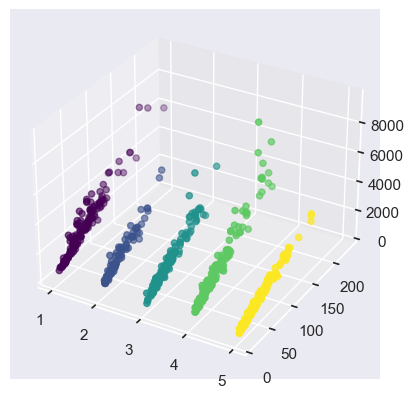

In [73]:
# Affichons tout ça en 3D
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure().gca(projection='3d')

# Pour faciliter la visualisation, on va changer la valeur de l'arrondissement (10)
tmp_arr = data['arrondissement'][:]
tmp_arr[tmp_arr == 10] = 5

fig.scatter(tmp_arr, data['surface'], data['price'], c=tmp_arr, cmap="viridis")
plt.show()

In [74]:
# On va effectuer une régression sur chaque arrondissement pour être plus précis. D'abord on sépare en training/testing set.
# On veut prédire y = price, sachant X = [surface, arrondissement]
xtrain, xtest, ytrain, ytest = train_test_split(data[["surface", "arrondissement"]], data["price"], train_size = 0.7)

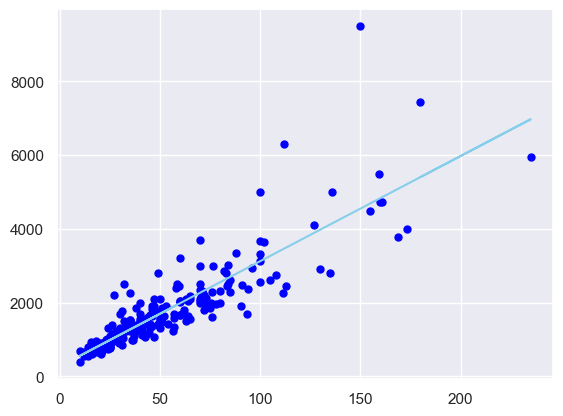

In [84]:
# Pour montrer que ça sert à qqch de régresser différement selon l'arrondissement, on commence par faire une régression sans
# prendre en compte l'arrondissement
lr_baseline = LinearRegression().fit(xtrain[["surface"]], ytrain)
baseline_pred = lr.predict(xtest[["surface"]])

plt.plot(xtest[["surface"]], ytest, "o", color="blue", markersize=5)
plt.plot(xtest[["surface"]], baseline_pred, "-", color = "skyblue")
plt.show()

In [85]:
def sumsq(x,y):
    return sum((x - y)**2)

def r2score(pred, target):
    return 1 - sumsq(pred, target) / sumsq(target, np.mean(target))

score_bl = r2score(lr_baseline[:,0], ytest['price'])

score_bl

TypeError: 'LinearRegression' object is not subscriptable